===== MODELOS DE REGRESIÓN POLINÓMICA =====

In [1]:
import numpy as np
import pandas as pd

# cargar datos
try:
    
    df_pol = pd.read_csv(r'C:\\Users\\ander\\Escritorio\\PYTHON\\Python 2025\\machine_learning\\datasets\\data.csv', sep=',', encoding='utf-8-sig')
    print('✅ Archivo cargado correctamente')
except FileNotFoundError:
    print('❌ Error al cargar el archivo')
   

✅ Archivo cargado correctamente


In [2]:
df_pol.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
 # Información del dataset
print(f'''
    Tamaño del dataset: \n{df_pol.shape}\n\n
    Informaciáon básica: \n{df_pol.info}\n\n
    columnas: \n{df_pol.columns}\n\n
    Valores nulos: \n{df_pol.isnull().sum()}\n\n
    Valores únicos: \n{df_pol.nunique()}\n\n
''')



    Tamaño del dataset: 
(511, 14)


    Informaciáon básica: 
<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
506  0.98765   0.0  12.50     0  0.561  6.980  89.0  2.0980    3  320   
507  0.23456   0.0  12.50     0  0.561  6.980  76.0  2.6540    3  320   
508  0.44433   0.0  12.50     0  0.561  6.123  98.0  2.9870    3  320   
509  0.77763   0.0  12.70     0  0.561  6.222  34.0  2.5430    3  329   
510  0.65432   0.0  12.80     0  0.561  6.760  67.0  2.9870    3  345   

     PTRATIO       B  LSTAT

In [4]:
# cambiar nombres de columnas para mejorar la visualización
df_pol_rename= {
    'CRIM': 'delitos',
    'ZN': 'zona',
    'INDUS': 'industria',
    'CHAS': 'río',
    'NOX': 'óxido',
    'RM': 'habitaciones',
    'AGE': 'edad',
    'DIS': 'distancia',
    'RAD': 'radio',
    'TAX': 'impuesto',
    'PTRATIO': 'población',
    'B': 'b',
    'LSTAT': 'pobreza',
    'MEDV': 'precio'
}
df = df_pol.rename(columns=df_pol_rename)
print(df.columns)



Index(['delitos', 'zona', 'industria', 'río', 'óxido', 'habitaciones', 'edad',
       'distancia', 'radio', 'impuesto', 'población', 'b', 'pobreza',
       'precio'],
      dtype='object')


In [5]:
# estadistica descriptiva
print(f' Estadística Descriptiva: \n{df.describe().T}')  # .T transpone filas con columnas

 Estadística Descriptiva: 
              count        mean         std        min         25%        50%  \
delitos       511.0    3.584139    8.564433    0.00632    0.082325    0.26169   
zona          511.0   11.252446   23.234838    0.00000    0.000000    0.00000   
industria     511.0   11.151096    6.828175    0.46000    5.190000    9.69000   
río           511.0    0.068493    0.252838    0.00000    0.000000    0.00000   
óxido         511.0    0.554757    0.115310    0.38500    0.449000    0.53800   
habitaciones  506.0    6.287589    0.703802    3.56100    5.885500    6.20900   
edad          511.0   68.616243   28.099130    2.90000   45.050000   77.30000   
distancia     511.0    3.783876    2.098631    1.12960    2.100350    3.15230   
radio         511.0    9.485323    8.688469    1.00000    4.000000    5.00000   
impuesto      511.0  407.440313  167.903532  187.00000  279.500000  330.00000   
población     511.0   18.500000    2.200348   12.60000   17.400000   19.10000   
b

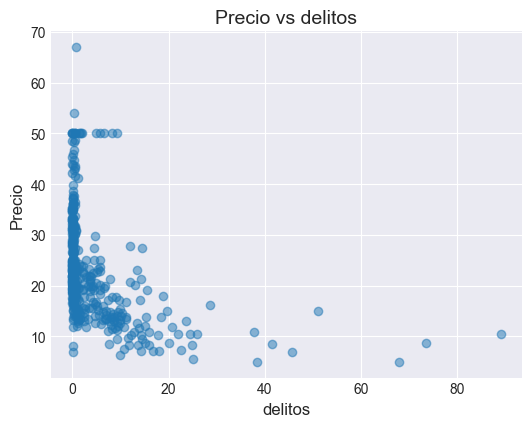

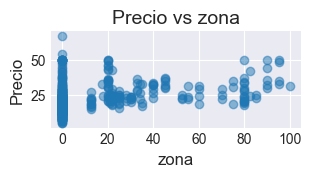

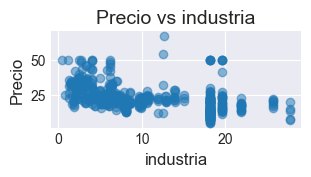

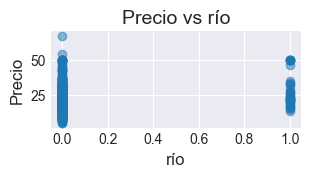

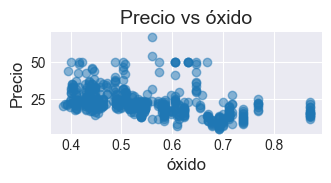

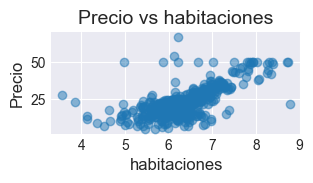

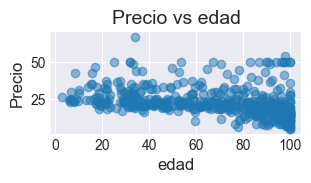

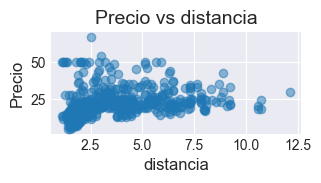

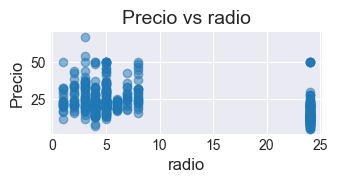

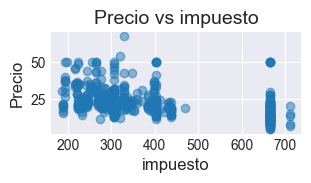

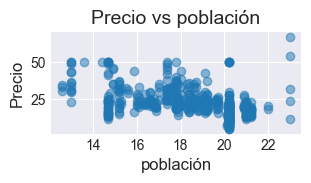

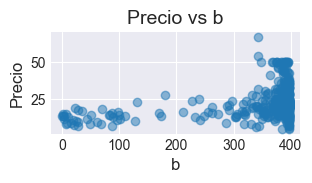

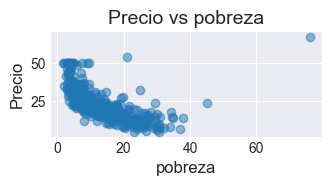

In [6]:
import matplotlib.pyplot as plt

# configuración de matplotlib para mejorar la visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10

# gráficas de dispersión con variables de interés
plt.figure(figsize=(20, 16))
# ciclo for para graficar todas las variables
for i, column in enumerate(df.columns[:-1]):  # Excluir la última columna 'precio'
    plt.subplot(4, 4, i + 1)
    plt.scatter(df[column], df['precio'], alpha=0.5)
    plt.title(f'Precio vs {column}')
    plt.xlabel(column)
    plt.ylabel('Precio')
    plt.tight_layout()
    plt.show()

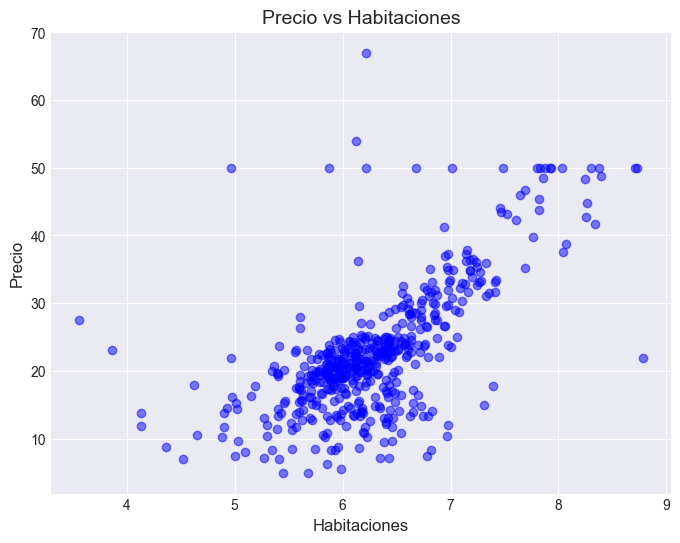

In [7]:
# Para primer caso tomaremos el scatter plot de 'habitaciones' vs 'precio'
plt.figure(figsize=(8, 6))
plt.scatter(df['habitaciones'], df['precio'], alpha=0.5, color='blue')
plt.title('Precio vs Habitaciones')  # Título del gráfico
plt.xlabel('Habitaciones')  # Etiqueta del eje x
plt.ylabel('Precio')  # Etiqueta del eje y  
plt.grid(True)  # Añadir cuadrícula
plt.show()

=== MOLDELO POLINÓMICO ===

In [8]:
df_copy = df.copy()  # crear una copia del dataframe original
# tratamiento de valores nulos para columna 
mean_hab = df['habitaciones'].mean()  # calcular la media de la columna
df_copy['habitaciones'] = df['habitaciones'].fillna(mean_hab)
df_copy_hab =  df_copy['habitaciones'].isnull().sum()
# verificar que no haya nulos
print(f'Valores nulos en habitaciones: {df_copy_hab}')

Valores nulos en habitaciones: 0


In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   delitos       511 non-null    float64
 1   zona          511 non-null    float64
 2   industria     511 non-null    float64
 3   río           511 non-null    int64  
 4   óxido         511 non-null    float64
 5   habitaciones  511 non-null    float64
 6   edad          511 non-null    float64
 7   distancia     511 non-null    float64
 8   radio         511 non-null    int64  
 9   impuesto      511 non-null    int64  
 10  población     511 non-null    float64
 11  b             511 non-null    float64
 12  pobreza       511 non-null    float64
 13  precio        511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


array([[<Axes: title={'center': 'delitos'}>,
        <Axes: title={'center': 'zona'}>,
        <Axes: title={'center': 'industria'}>,
        <Axes: title={'center': 'río'}>],
       [<Axes: title={'center': 'óxido'}>,
        <Axes: title={'center': 'habitaciones'}>,
        <Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'distancia'}>],
       [<Axes: title={'center': 'radio'}>,
        <Axes: title={'center': 'impuesto'}>,
        <Axes: title={'center': 'población'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'pobreza'}>,
        <Axes: title={'center': 'precio'}>, <Axes: >, <Axes: >]],
      dtype=object)

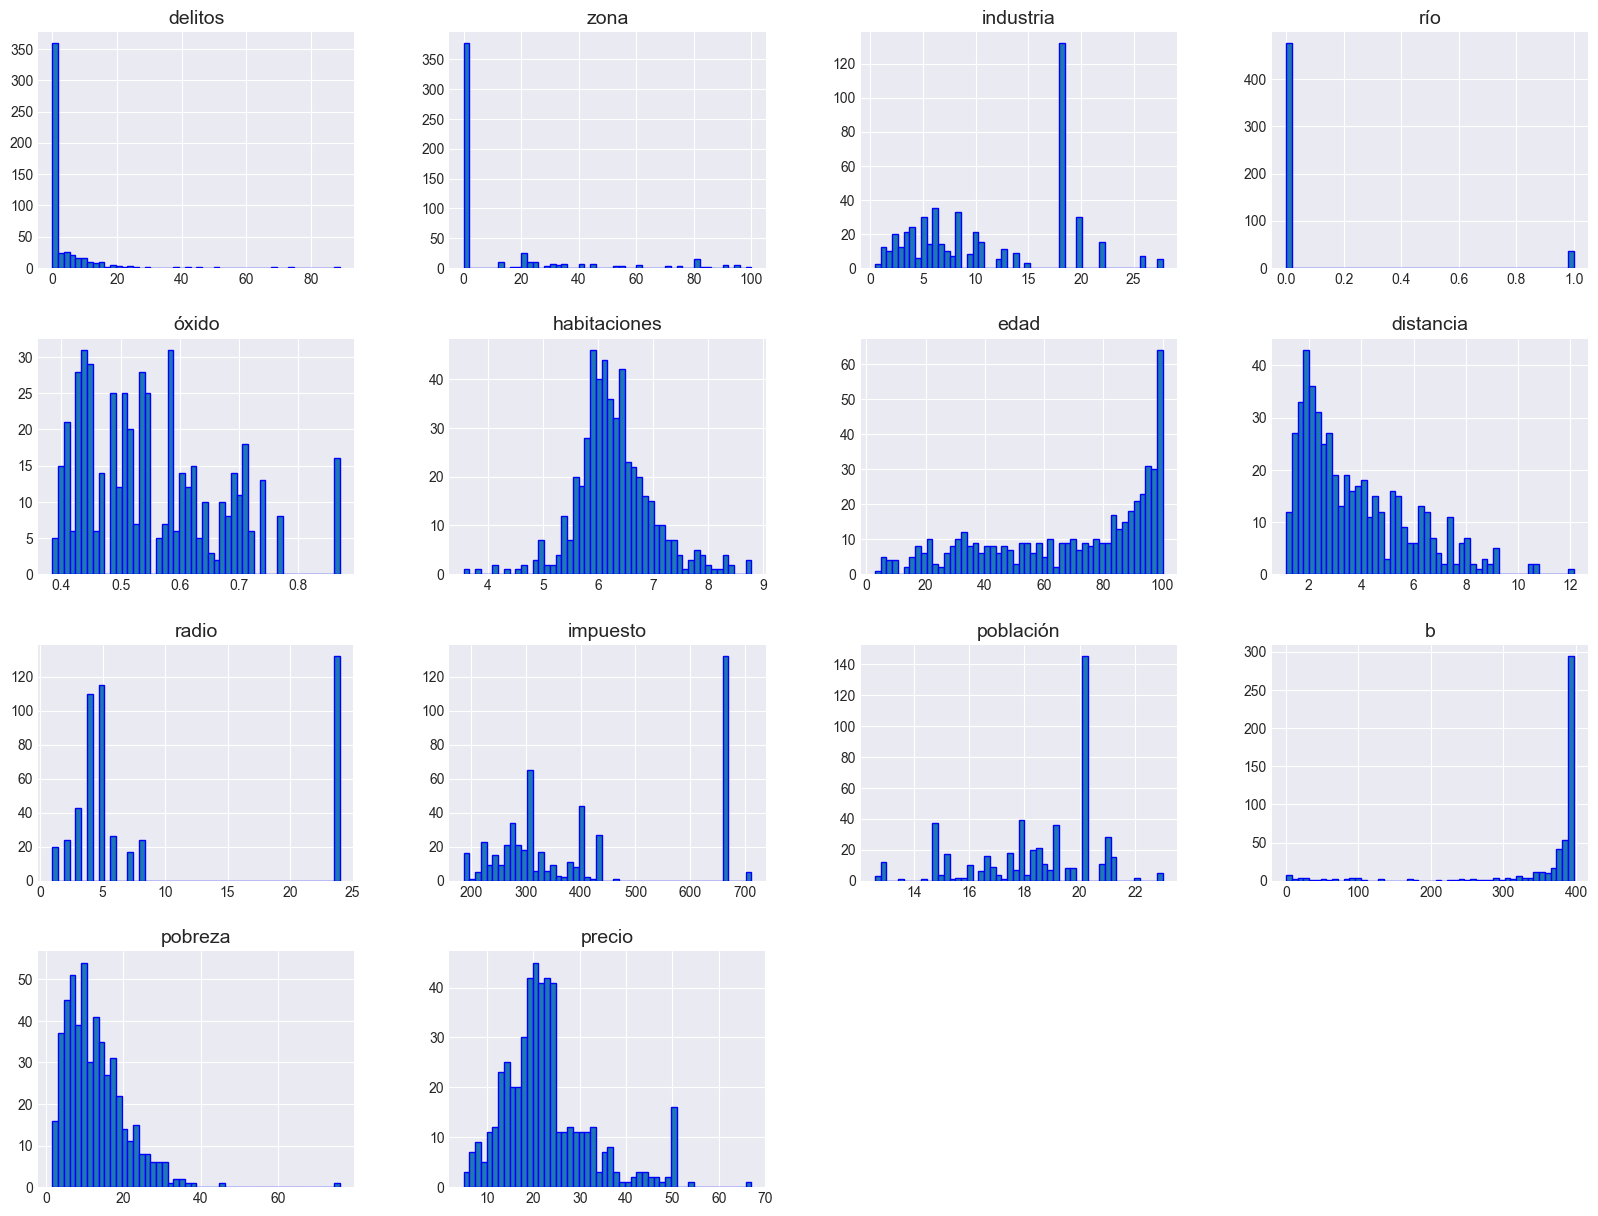

In [10]:
df_copy.hist(bins=50, edgecolor='blue', figsize=(20, 15))

In [11]:
# Aplicanción de regresión polinómica
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Seleccionar variable independiente y dependiente
X = df_copy['habitaciones'].values.reshape(-1, 1)  # Variable independiente
y = df.iloc[:,-1].values # Variable dependiente

# instanciar el objeto PolynomialFeatures con grado 2 (cuadrática)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)  # Transformar X a características polinómicas
X_test, X_train, y_test, y_train = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print(f'Características polinómicas (primeras 4 filas): \n{X_poly[:4]}')


Características polinómicas (primeras 4 filas): 
[[1.00000000e+00 6.57500000e+00 4.32306250e+01 2.84241359e+02
  1.86888694e+03]
 [1.00000000e+00 6.42100000e+00 4.12292410e+01 2.64732956e+02
  1.69985031e+03]
 [1.00000000e+00 7.18500000e+00 5.16242250e+01 3.70920057e+02
  2.66506061e+03]
 [1.00000000e+00 6.99800000e+00 4.89720040e+01 3.42706084e+02
  2.39825718e+03]]


In [12]:
regresion = LinearRegression()
regresion.fit(X_poly, y)  # Entrenar el modelo con las características polinómicas


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


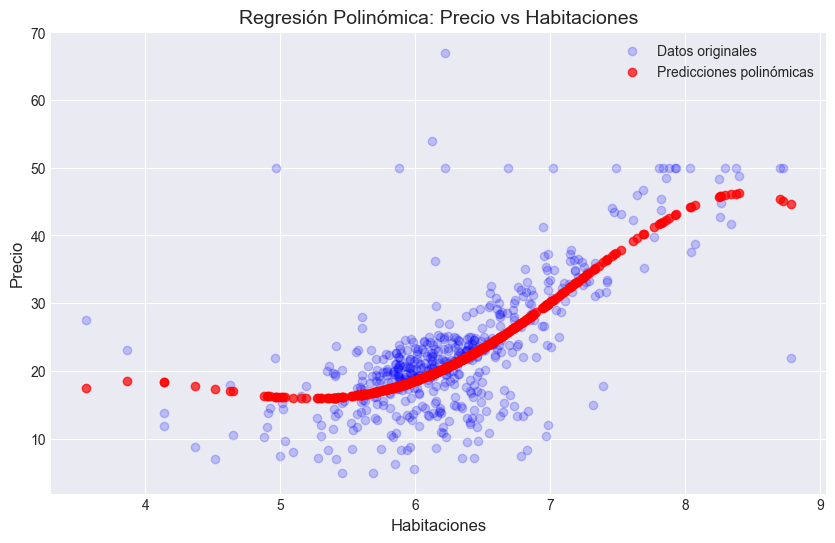

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.2, label='Datos originales')
plt.scatter(X, regresion.predict(X_poly), color='red', alpha=0.7, label='Predicciones polinómicas')
plt.title('Regresión Polinómica: Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [14]:

prediction = poly.fit_transform([[4]])
regresion.predict(prediction)


array([18.54473531])

In [15]:
# imoportando r2 score para evaluar el modelo
from sklearn.metrics import r2_score

y_pred = regresion.predict(X_poly)
r2 = r2_score(y, y_pred)
print(f'Presición R² del modelo de regresión polinómica: {r2:.4f}')

Presición R² del modelo de regresión polinómica: 0.5217


==== SUPPORT VECTOR REGRESSION (MÁQUINAS DE VECTORES DE SOPORTE) ====

In [16]:
# importando soporte vectorial para regresión
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Seleccionar variable independiente y dependiente
X = df_copy['habitaciones'].values.reshape(-1, 1)  # Variable independiente
y = df.iloc[:,-1].values # Variable dependiente

# dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# crear el modelo SVR con kernel RBF
svr = SVR(kernel='poly', C=20, degree=4, epsilon=0.1)
svr.fit(X_train, y_train)


,kernel,'poly'
,degree,4
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,20
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [17]:
# predicción con el modelo SVR
y_pred_svr = svr.predict(X_test)
# comparar predicciones con valores reales
print(f' Valores reales: {y_test[:4]}\n Predicciones: {y_pred_svr[:4]}\n')

 Valores reales: [18.8 23.9 14.3 20.9]
 Predicciones: [17.43800324 59.21153659 63.6022628  17.22219449]



In [18]:
# calculando el R² para evaluar el modelo SVR
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Presición R² del modelo SVR: {r2_svr:.4f}')

Presición R² del modelo SVR: -46.8423


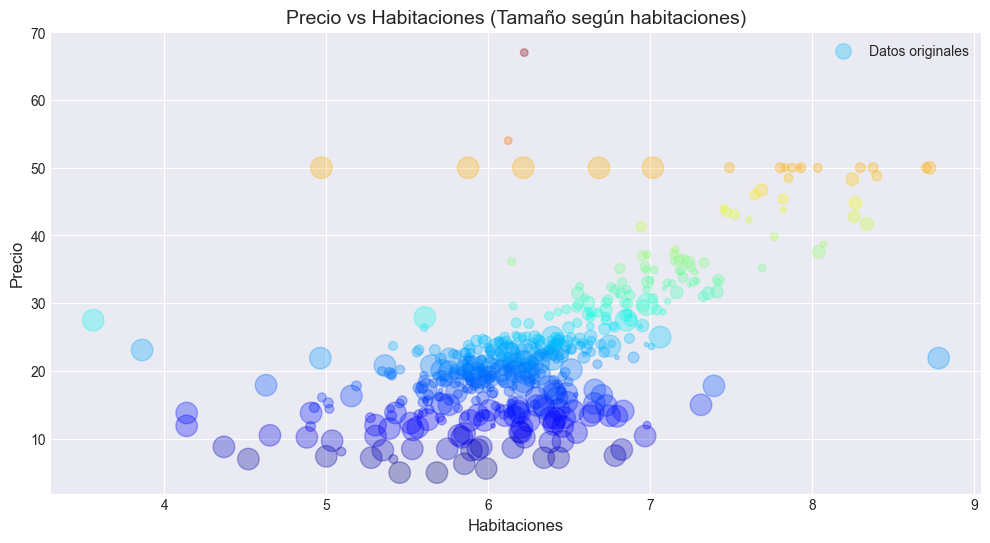

In [19]:
plt.scatter(
    X, y, 
    alpha=0.3, 
    label='Datos originales',
    s=df_copy['radio'] * 10,
    c=df_copy['precio'],
    cmap=plt.get_cmap('jet')
)
plt.title('Precio vs Habitaciones (Tamaño según habitaciones)')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


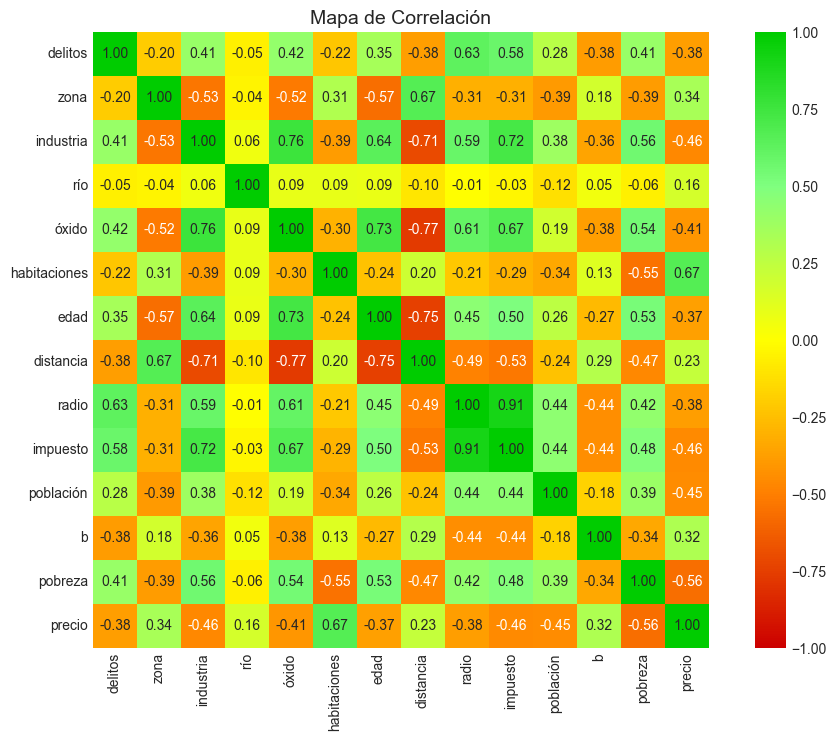

In [20]:
# mapa de correlación para tdas las variables
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
colors = [
    (0.8, 0.0, 0.0), 
    (1.0, 0.5, 0.0), 
    (1.0, 1.0, 0.0), 
    (0.5, 1.0, 0.5), 
    (0.0, 0.8, 0.0)
]  # De rojo a verde
cmap = LinearSegmentedColormap.from_list('red_white_green', colors, N=256)

plt.figure(figsize=(12, 8))
correlation_matrix = df_copy.corr()
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap=cmap, 
    square=True, 
    vmax=1,
    center=0 ,
    vmin=-1)
plt.title('Mapa de Correlación')
plt.show()


In [21]:
# correlación entre variables
print(f' Correlación entre variables: \n{df_copy.corr()["precio"].sort_values(ascending=False)}')

 Correlación entre variables: 
precio          1.000000
habitaciones    0.666954
zona            0.339767
b               0.317941
distancia       0.233469
río             0.164782
edad           -0.368203
radio          -0.379016
delitos        -0.380072
óxido          -0.411486
población      -0.447464
impuesto       -0.459274
industria      -0.463269
pobreza        -0.562960
Name: precio, dtype: float64


In [47]:
np_copy_pol = df_copy[['precio', 'habitaciones', 'zona', 'b', 'distancia', 'río']].values
df_copy_pol = pd.DataFrame(df_copy, columns=['precio', 'habitaciones', 'zona', 'b', 'distancia', 'río'])
print(df_copy_pol.head(5))
print(df_copy_pol.shape)

   precio  habitaciones  zona       b  distancia  río
0    24.0         6.575  18.0  396.90     4.0900    0
1    21.6         6.421   0.0  396.90     4.9671    0
2    34.7         7.185   0.0  392.83     4.9671    0
3    33.4         6.998   0.0  394.63     6.0622    0
4    36.2         7.147   0.0  396.90     6.0622    0
(511, 6)


### COMBINACIÓN DE VARIABLES

In [48]:
# manipulacion de datos categóricos
from sklearn.preprocessing import OrdinalEncoder
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   delitos       511 non-null    float64
 1   zona          511 non-null    float64
 2   industria     511 non-null    float64
 3   río           511 non-null    int64  
 4   óxido         511 non-null    float64
 5   habitaciones  511 non-null    float64
 6   edad          511 non-null    float64
 7   distancia     511 non-null    float64
 8   radio         511 non-null    int64  
 9   impuesto      511 non-null    int64  
 10  población     511 non-null    float64
 11  b             511 non-null    float64
 12  pobreza       511 non-null    float64
 13  precio        511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


### REGRESIÓN BINOMIAL DE VARIABLES MULTIPLES

In [49]:
# librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [63]:
# variables independientes y dependientes
# variables independientes
X = df_copy_pol[['habitaciones','zona', 'b', 'distancia', 'río']].values  # Variable independiente
y = df_copy_pol['precio'].values.reshape(-1,1)# Variable dependiente
# instanciar el PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)  # Transformar X a características polinómicas
X_test, X_train, y_test, y_train = train_test_split(X_poly, y, test_size=0.2, random_state=42)
print(f'Características polinómicas (primeras 4 filas): \n{X_poly[:4]}')

Características polinómicas (primeras 4 filas): 
[[1.00000000e+00 6.57500000e+00 1.80000000e+01 3.96900000e+02
  4.09000000e+00 0.00000000e+00 4.32306250e+01 1.18350000e+02
  2.60961750e+03 2.68917500e+01 0.00000000e+00 3.24000000e+02
  7.14420000e+03 7.36200000e+01 0.00000000e+00 1.57529610e+05
  1.62332100e+03 0.00000000e+00 1.67281000e+01 0.00000000e+00
  0.00000000e+00 2.84241359e+02 7.78151250e+02 1.71582351e+04
  1.76813256e+02 0.00000000e+00 2.13030000e+03 4.69731150e+04
  4.84051500e+02 0.00000000e+00 1.03575719e+06 1.06733356e+04
  0.00000000e+00 1.09987257e+02 0.00000000e+00 0.00000000e+00
  5.83200000e+03 1.28595600e+05 1.32516000e+03 0.00000000e+00
  2.83553298e+06 2.92197780e+04 0.00000000e+00 3.01105800e+02
  0.00000000e+00 0.00000000e+00 6.25235022e+07 6.44296105e+05
  0.00000000e+00 6.63938289e+03 0.00000000e+00 0.00000000e+00
  6.84179290e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.86888694e+03 5.11634447e+03 1.12815396e+05 1.16254716e+03
  0.00000000e+00 1.40

In [64]:
# regresion lineal
reg_pol = LinearRegression()
reg_pol.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


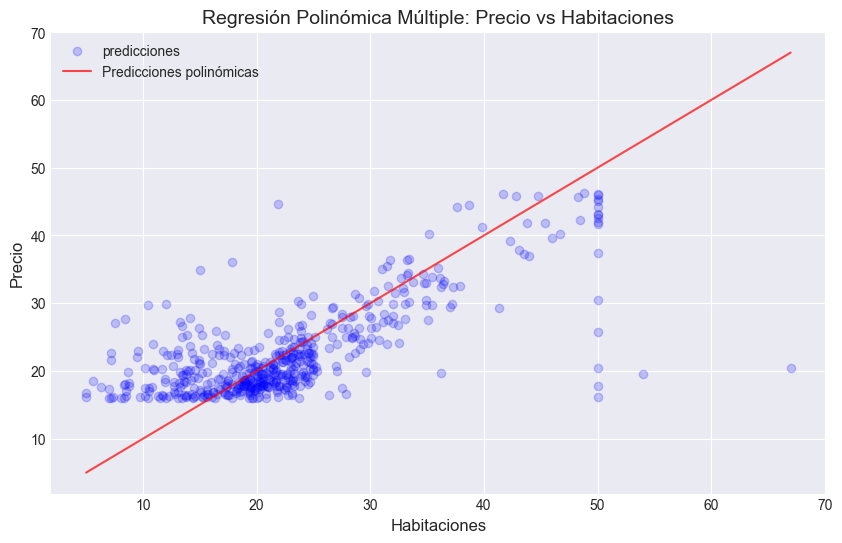

In [72]:
# Graficando las predicciones  
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.2, label='predicciones')
plt.plot([y.min(),y.max()],[y.min(),y.max()], color='red', alpha=.7, label='Predicciones polinómicas')
plt.title('Regresión Polinómica Múltiple: Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show() 

In [71]:
# r2
y_pred_pol = reg_pol.predict(X_poly)
r2_pol = r2_score(y, y_pred_pol)
print(f'Presición R² del modelo de regresión polinómica múltiple: {r2_pol:.4f}')

Presición R² del modelo de regresión polinómica múltiple: 0.7396


### ARBOL DE REGRESIÓN

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [81]:
columnas = ['habitaciones','zona', 'b', 'distancia', 'río', 'precio', 'población', 'impuesto']
col_modelo = []
data_model = df_copy[columnas]
y = data_model['precio'].values.reshape(-1,1)    

for col in columnas:
    col_modelo.append(col)
    data = df_copy[col_modelo]
    X = data.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'Columnas: {col_modelo} - R²: {r2:.4f}')

Columnas: ['habitaciones'] - R²: 0.1894
Columnas: ['habitaciones', 'zona'] - R²: 0.2194
Columnas: ['habitaciones', 'zona', 'b'] - R²: 0.2949
Columnas: ['habitaciones', 'zona', 'b', 'distancia'] - R²: 0.2968
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río'] - R²: 0.3119
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río', 'precio'] - R²: 1.0000
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río', 'precio', 'población'] - R²: 1.0000
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río', 'precio', 'población', 'impuesto'] - R²: 1.0000


### ARBOLES DE REGRESIÓN

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
# nota. para los arboles de regresion y bosques aleatorios no es necesario escalar los datos

In [88]:
columnas = ['habitaciones','zona', 'b', 'distancia', 'río', 'precio', 'población', 'impuesto']
col_modelo = []
data_model = df_copy[columnas]
y = data_model['precio'].values.reshape(-1,1)    

for col in columnas:
    col_modelo.append(col)
    data = df_copy[col_modelo]
    X = data.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'Columnas: {col_modelo} - R²: {r2:.4f}')

Columnas: ['habitaciones'] - R²: -0.1382
Columnas: ['habitaciones', 'zona'] - R²: -0.0533
Columnas: ['habitaciones', 'zona', 'b'] - R²: 0.1714
Columnas: ['habitaciones', 'zona', 'b', 'distancia'] - R²: 0.1934
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río'] - R²: 0.2783
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río', 'precio'] - R²: 0.9800
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río', 'precio', 'población'] - R²: 0.9799
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río', 'precio', 'población', 'impuesto'] - R²: 0.9799


### BOSQUE ALEATORIO

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
columnas = ['habitaciones','zona', 'b', 'distancia', 'río', 'precio', 'población', 'impuesto']
col_modelo = []
data_model = df_copy[columnas]
y = data_model['precio'].values  

for col in columnas:
    col_modelo.append(col)
    data = df_copy[col_modelo]
    X = data.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    forest_reg = RandomForestRegressor()
    forest_reg.fit(X_train, y_train)
    y_pred = forest_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'Columnas: {col_modelo} - R²: {r2:.4f}')

Columnas: ['habitaciones'] - R²: 0.0080
Columnas: ['habitaciones', 'zona'] - R²: 0.1355
Columnas: ['habitaciones', 'zona', 'b'] - R²: 0.4119
Columnas: ['habitaciones', 'zona', 'b', 'distancia'] - R²: 0.4445
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río'] - R²: 0.4427
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río', 'precio'] - R²: 0.9767
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río', 'precio', 'población'] - R²: 0.9754
Columnas: ['habitaciones', 'zona', 'b', 'distancia', 'río', 'precio', 'población', 'impuesto'] - R²: 0.9754
